<a href="https://colab.research.google.com/github/luismiguelcasadodiaz/IBM_SkillsBuild_IA_325/blob/main/IA_325_py_cod_ex_39_s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clasificar piezas industriales

## 🎯 Objetivo general

Desarrollar un sistema automático de inspección de calidad para piezas industriales usando aprendizaje automático. Para ello, implementarás varias clases en Python que simulan la creación de datos, entrenan un modelo de clasificación (SVM) y visualizan los resultados.

Este proyecto se validará con tests automáticos, por lo tanto, **las clases y métodos deben tener exactamente los nombres y firmas indicadas**.



## 📦 Clases y métodos obligatorios

  + #### 1. class Piece. Representa una pieza individual con sus características físicas y su etiqueta de calidad.

    + Constructor:

      + def __init__(self, texture, symmetry, edges, center_offset, label):

        + texture (float): Nivel de textura/homogeneidad (entre 0 y 1).
        + symmetry (float): Grado de simetría (entre 0 y 1).
        + edges (float): Número de bordes detectados.
        + center_offset (float): Desviación del centro respecto al ideal.
        + label (str): "Correcta" o "Defectuosa".

    + Método requerido:

      + def to_vector(self) -> list: Devuelve [texture, symmetry, edges, center_offset]




  + #### 2. class PieceDatasetGenerator. Genera una lista de objetos Piece simulando datos industriales con una lógica de clasificación basada en reglas.

    + Constructor:

      + def __init__(self, n=400): n: número de piezas a generar (por defecto 400).

    + Método requerido:

      + def generate(self) -> list: Devuelve una lista de objetos Piece, cada uno con su etiqueta calculada

        + 💡 Lógica de generación: Cada característica se genera aleatoriamente según distribuciones normales.
        
|Característica   |Distribución aproximada|
|-----------------|-----------------------|
|Textura          |Normal( 0.5,  0.15)    |
|Simetría         |Normal( 0.6,  0.2 )    |
|Bordes           |Normal(50  , 15   )    |
|Offset del centro|Normal( 0  ,  0.2 )    |


        + 🔎 Reglas de clasificación: Una pieza será etiquetada como "Defectuosa" si cumple al menos una de estas condiciones:

          + symmetry < 0.4 y center_offset > 0.25,
          + o bien texture < 0.35,
          + o bien edges < 30,
          + o bien center_offset > 0.35.
          + En caso contrario, será etiquetada como "Correcta"



  + #### 3. class PieceClassifier. Entrena un modelo de clasificación usando SVM y permite evaluar y predecir etiquetas de nuevas piezas.

    + Constructor:

      + def __init__(self):

    + Métodos requeridos:

      + def fit(self, pieces: list) -> None: Entrena el modelo SVM con una lista de objetos Piece
      + def predict(self, texture, symmetry, edges, center_offset) -> str:   Predice si una pieza con esas características es "Correcta" o "Defectuosa"
      + def evaluate(self, test_data: list) -> None: Muestra matriz de confusión e informe de clasificación (usa sklearn)

    + El modelo debe usar:
    ```python
        from sklearn.svm import SVC
        SVC(kernel='rbf', gamma='scale', C=1.0)
    ```



  + #### 4. class PieceAnalysisExample. Clase demostrativa que **conecta todas las partes del proyecto** y muestra un ejemplo completo de uso del sistema.

    + Métodos:

      + def run(self) -> None: Este método debe realizar todo el flujo de trabajo del sistema:

      ✅ Flujo completo requerido:

      + 1.- Generación de datos:

        + Crear un objeto PieceDatasetGenerator (usar valor por defecto: 400 piezas).

        + Llamar a .generate() para obtener las piezas.

      + 2.- División de datos:

        + Usar train_test_split de sklearn.model_selection.

        + Separar en 70% entrenamiento y 30% test.

        + Usar random_state=42.

      + 3.- Entrenamiento:

        + Crear un PieceClassifier.

        + Llamar a .fit() con los datos de entrenamiento.

      + 4.- Evaluación:

        + Llamar a .evaluate() con los datos de prueba.

        + Mostrar matriz de confusión e informe de clasificación.

      + 5.- Predicción personalizada:

        + Predecir la clase de una pieza con estas características:(0.45, 0.5, 45, 0.15)

        + Mostrar por pantalla las características y el resultado predicho.

      + 6.- Visualización:

        + Crear un DataFrame con los siguientes campos: "Textura", "Simetría", "Bordes", "Offset", "Etiqueta"

        + Crear un scatter plot:

          + Eje X: "Textura"

          + Eje Y: "Offset"

          + Colores: verde = "Correcta", rojo = "Defectuosa"

          + Agregar título: "🏭 Clasificación de piezas industriales"

          + Mostrar leyenda y rejilla





## 🎯 Ejemplo de uso
```python
example = PieceAnalysisExample()
example.run()
```

## Salida esperada
```python
📊 Matriz de confusión:
[[87  0]
 [28  5]]

📝 Informe de clasificación:
              precision    recall  f1-score   support

    Correcta       0.76      1.00      0.86        87
  Defectuosa       1.00      0.15      0.26        33

    accuracy                           0.77       120
   macro avg       0.88      0.58      0.56       120
weighted avg       0.82      0.77      0.70       120


🔎 Predicción de pieza personalizada:
  → Textura: 0.45, Simetría: 0.50, Bordes: 45, Offset: 0.15
  → Clasificación: Correcta
  ```

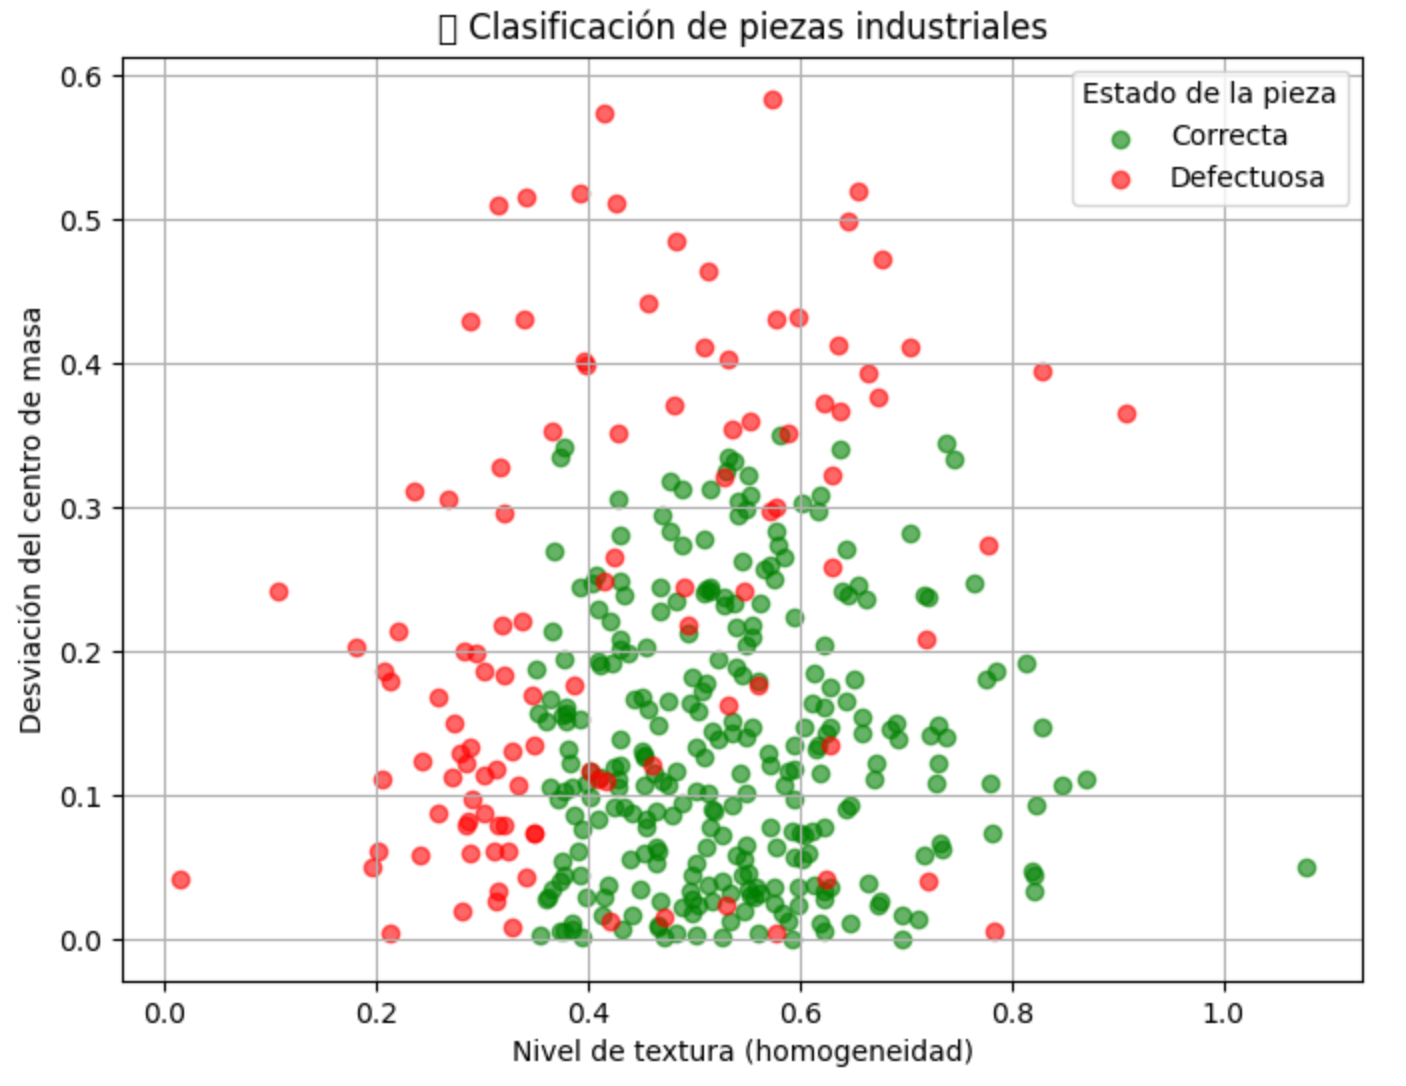

## Importación de librerías

In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import unittest

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

## Definición de la clase Piece

In [285]:
class Piece:
  """
    Representa una pieza industrial individual con sus características físicas y etiqueta de calidad.
  """
  def __init__(self, texture:float, symmetry:float, edges:float, center_offset:float, label:str=None):
    if label is not None and ( (not isinstance(label, str) ) or (label not in ['Correcta', 'Defectuosa'] ) ):
    """
        Constructor de la clase Piece.

        Args:
            texture (float): Nivel de textura/homogeneidad (entre 0 y 1).
            symmetry (float): Grado de simetría (entre 0 y 1).
            edges (float): Número de bordes detectados.
            center_offset (float): Desviación del centro respecto al ideal.
            label (str): Etiqueta de calidad ("Correcta" o "Defectuosa").
    """


      raise ValueError("La etiqueta debe ser:'Correcta' o 'Defectuosa'")
    if not isinstance(texture, float) or not isinstance(symmetry, float) or not isinstance(edges, float) or not isinstance(center_offset, float):
      raise ValueError("Los atributos deben ser de tipo float")
    self.texture = texture
    self.symmetry = symmetry
    self.edges = edges
    self.center_offset = center_offset
    self.label = label
  def to_vector(self):
    """
        Convierte las características físicas de la pieza en una lista.

        Returns:
            list: Una lista que contiene [texture, symmetry, edges, center_offset, label].
    """
    return [self.texture, self.symmetry, self.edges, self.center_offset, self.label]
  def __str__(self):
    return f"Textura: {self.texture}, Simetría: {self.symmetry}, Bordes: {self.edges}, Desplazamiento del centro: {self.center_offset}"


#### test para la clase Piece

In [286]:
class TestPiece(unittest.TestCase):

    def test_piece_creation(self):
        """Test that a Piece object is created correctly."""
        piece = Piece(texture=0.5, symmetry=0.6, edges=50.0, center_offset=0.1, label="Correcta")
        self.assertEqual(piece.texture, 0.5)
        self.assertEqual(piece.symmetry, 0.6)
        self.assertEqual(piece.edges, 50.0)
        self.assertEqual(piece.center_offset, 0.1)
        self.assertEqual(piece.label, "Correcta")

    def test_to_vector(self):
        """Test the to_vector method returns the correct list."""
        piece = Piece(texture=0.7, symmetry=0.8, edges=60.0, center_offset=0.05, label="Defectuosa")
        self.assertEqual(piece.to_vector(), [0.7, 0.8, 60.0, 0.05, "Defectuosa" ])

    def test_piece_with_different_label(self):
        """Test creating a piece with the 'Defectuosa' label."""
        piece = Piece(texture=0.2, symmetry=0.3, edges=20.0, center_offset=0.4, label="Defectuosa")
        self.assertEqual(piece.label, "Defectuosa")

In [287]:
loader = unittest.TestLoader()
suite = loader.loadTestsFromTestCase(TestPiece)
runner = unittest.TextTestRunner()
runner.run(suite)

...
----------------------------------------------------------------------
Ran 3 tests in 0.003s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

## Definición de la clase PieceDatasetGenerator

In [288]:
class PieceDatasetGenerator:

  """
    Genera un conjunto de datos simulado de piezas industriales con características
    aleatorias y una etiqueta de calidad basada en reglas predefinidas.
  """

  def __init__(self, n=400):
    """
        Constructor de la clase PieceDatasetGenerator.

        Args:
            n (int): Número de piezas a generar.
    """
    if not isinstance(n, int) or n <= 0:
      raise ValueError("El número de piezas debe ser un entero positivo")
    self.n = n
  def generate(self)->list:
    """
        Genera una lista de objetos Piece simulando datos industriales.

        Las características de cada pieza se generan aleatoriamente
        según distribuciones normales específicas:
        - Textura:           Normal(media= 0.5, std= 0.15)
        - Simetría:          Normal(media= 0.6, std= 0.2)
        - Bordes:            Normal(media=50,   std=15)
        - Offset del centro: Normal(media= 0,   std= 0.2)

        La etiqueta de calidad ("Correcta" o "Defectuosa") se asigna
        basada en las siguientes reglas:
        Una pieza es "Defectuosa" si cumple al menos una de estas condiciones:
        - symmetry < 0.4 y center_offset > 0.25
        - texture < 0.35
        - edges < 30
        - center_offset > 0.35
        En caso contrario, es "Correcta".

        Returns:
            list: Una lista de objetos Piece generados.
    """
    pieces = []
    np.random.seed(42)
    for _ in range(self.n):
      # genero entero positivo para textura
      invalido = True
      while invalido:
        texture = np.random.normal(0.5, 0.15)
        invalido = (texture < 0)

      # genero entero positivo para simetría
      invalido = True
      while invalido:
        symmetry = np.random.normal(0.6, 0.2)
        invalido = (symmetry < 0)

      # genero entero positivo para bordes
      invalido = True
      while invalido:
        edges = np.random.normal(50, 15)
        invalido = (edges < 0)

      # genero entero positivo para desplazamiento del centro
      center_offset = np.random.normal(0, 0.2)

      logica = (symmetry < 0.4 and center_offset > 0.25)
      logica = logica or (texture < 0.35)
      logica = logica or (edges < 30)
      logica = logica or (center_offset > 0.35)
      label = "Defectuosa" if logica else "Correcta"
      pieces.append(Piece(texture, symmetry, edges, center_offset, label))
    return pieces

#### test para la clase PieceDatasetGenerator

In [289]:
class TestPieceDatasetGenerator(unittest.TestCase):

    def test_generator_creation_default_n(self):
        """Test that the generator is created with the default number of pieces."""
        generator = PieceDatasetGenerator()
        self.assertEqual(generator.n, 400)

    def test_generator_creation_custom_n(self):
        """Test that the generator is created with a custom number of pieces."""
        custom_n = 150
        generator = PieceDatasetGenerator(n=custom_n)
        self.assertEqual(generator.n, custom_n)

    def test_generate_returns_list_of_pieces(self):
        """Test that the generate method returns a list of Piece objects."""
        generator = PieceDatasetGenerator(n=50)
        pieces = generator.generate()
        self.assertIsInstance(pieces, list)
        self.assertEqual(len(pieces), 50)
        for piece in pieces:
            self.assertIsInstance(piece, Piece)

    def test_generate_applies_classification_rules(self):
        """Test that the classification rules are applied during generation."""
        # This test is a bit more complex as it relies on random generation
        # We can't guarantee exact numbers, but we can check for expected labels
        # based on some typical generated values (within a range)
        generator = PieceDatasetGenerator(n=1000) # Generate more to increase likelihood
        pieces = generator.generate()

        def check_label(piece):
            # Replicate the classification logic from your class
            if (piece.symmetry < 0.4 and piece.center_offset > 0.25) or \
               piece.texture < 0.35 or \
               piece.edges < 30 or \
               piece.center_offset > 0.35:
                return "Defectuosa"
            else:
                return "Correcta"

        for piece in pieces:
            self.assertEqual(piece.label, check_label(piece), f"Piece characteristics: {piece.to_vector()}")

    def test_generate_uses_normal_distributions(self):
        """Test that the characteristics are generated using approximately normal distributions."""
        # This test is also probabilistic. We'll check if the mean and std are
        # close to the expected values for a large number of samples.
        generator = PieceDatasetGenerator(n=5000) # Use a large sample size
        pieces = generator.generate()

        textures = [p.texture for p in pieces]
        symmetries = [p.symmetry for p in pieces]
        edges = [p.edges for p in pieces]
        center_offsets = [p.center_offset for p in pieces]
        print(np.mean(textures), np.std(textures))
        # Check means (allow for a small tolerance)
        self.assertAlmostEqual(np.mean(textures), 0.5, delta=0.05)
        self.assertAlmostEqual(np.mean(symmetries), 0.6, delta=0.05)
        self.assertAlmostEqual(np.mean(edges), 50, delta=2)
        self.assertAlmostEqual(np.mean(center_offsets), 0, delta=0.02)

        # Check standard deviations (allow for a small tolerance)
        self.assertAlmostEqual(np.std(textures), 0.15, delta=0.03)
        self.assertAlmostEqual(np.std(symmetries), 0.2, delta=0.03)
        self.assertAlmostEqual(np.std(edges), 15, delta=3)
        self.assertAlmostEqual(np.std(center_offsets), 0.2, delta=0.03)


In [290]:
loader = unittest.TestLoader()
suite = loader.loadTestsFromTestCase(TestPieceDatasetGenerator)
runner = unittest.TextTestRunner()
runner.run(suite)

.....
----------------------------------------------------------------------
Ran 5 tests in 0.050s

OK


0.5027468219493124 0.14899257255253845


<unittest.runner.TextTestResult run=5 errors=0 failures=0>

## Definición de la clase PieceClassifier

In [291]:
class PieceClassifier:
  """
    Entrena un modelo de clasificación usando Support Vector Machine (SVM)
    para clasificar piezas industriales y permite evaluar y predecir etiquetas.
  """
  def __init__(self):
  """
        Inicializa el clasificador de piezas.
        Crea una instancia del modelo SVM con parámetros predefinidos.
  """
    self.model = None

  def fit(self, pieces : list)-> None :
    """
        Entrena el modelo SVM con una lista de objetos Piece.

        Extrae las características y etiquetas de los objetos Piece
        para preparar los datos de entrenamiento.

        Args:
            pieces (list): Una lista de objetos Piece para entrenar el modelo.
    """
    if self.model is None:
      self.model = SVC(kernel='rbf', gamma='scale', C=1.0)
      X = np.array([[p.texture, p.symmetry, p.edges, p.center_offset] for p in pieces])
      y = np.array([piece.label for piece in pieces])
      self.model.fit(X, y)
    else:
      print ("El modelo ya está entrenado")

  def evaluate(self, pieces : list)-> None :
    """
        Predice la etiqueta de calidad ("Correcta" o "Defectuosa") para una pieza
        con características dadas.

        Args:
            texture (float): Nivel de textura/homogeneidad.
            symmetry (float): Grado de simetría.
            edges (float): Número de bordes detectados.
            center_offset (float): Desviación del centro respecto al ideal.

        Returns:
            str: La etiqueta predicha ("Correcta" o "Defectuosa").
                 Retorna None si el modelo no ha sido entrenado.
    """
    if self.model is None:
      print("El modelo no está entrenado")
    else:
      X_test = np.array([[p.texture, p.symmetry, p.edges, p.center_offset] for p in pieces])
      y_text = np.array([piece.label for piece in pieces])
      y_pred = self.model.predict(X_test)
      print("📊 Matriz de confusión:")
      print(confusion_matrix(y_text, y_pred))
      print("📝 Informe de clasificación:")
      print(classification_report(y_text, y_pred))

  def predict(self, texture, symmetry, edges, center_offset)-> str :
    """
        Evalúa el rendimiento del modelo utilizando datos de prueba.

        Muestra la matriz de confusión y el informe de clasificación
        usando las funciones de sklearn.

        Args:
            test_data (list): Una lista de objetos Piece utilizada para la evaluación.
    """
    if self.model is None:
      print("El modelo no está entrenado")
    else:
      X_test = np.array([[texture, symmetry, edges, center_offset]])
      y_pred = self.model.predict(X_test)
      return y_pred[0]


## Definición de la clase PieceAnalysisExample

In [292]:
class PieceAnalysisExample:
  def run(self)-> None :
    # Generación de los datos
    pdg = PieceDatasetGenerator()
    pieces = pdg.generate()

    # División de los datos
    pieces_train, pieces_test = train_test_split(pieces, test_size=0.3, random_state=42)

    # Entrenamiento
    pc = PieceClassifier()
    pc.fit(pieces)

    # Evaluación
    pc.evaluate(pieces)

    # Prediccion personalizada
    p = Piece(0.45, 0.5, 45.0, 0.15)
    p_etiqueta = pc.predict(p.texture, p.symmetry, p.edges, p.center_offset)
    print("🔎 Predicción de pieza personalizada:")
    print(p)
    print(f"Clasificación: {p_etiqueta}")

    # Definimos la figura
    fig = plt.figure(figsize=(10, 6))

    #Definimos diccionario de colores
    color_dict = {'Correcta': 'green', 'Defectuosa': 'red'}

    # Definimos x, y y c para el scatter
    x_data = [p.texture for p in pieces]
    y_data = [p.center_offset for p in pieces]
    c_data = [color_dict[p.label] for p in pieces]

    # Dibujamos los puntos de entrenamiento
    plt.scatter(x=x_data, y=y_data, c=c_data)



    # Pintamos una serie ficticia para los nombres de las series en la leyenda
    for k, v in color_dict.items():
        plt.scatter([], [], c=v, label=k)

    # Dibujamos la pieza estimada
    plt.scatter([p.texture], [p.center_offset], c='blue', label='Pieza personalizada', marker='*', s=100)

    # Elaboramos la leyenda con en título "Estado de la pieza" arriba a la derecha
    plt.legend(loc='upper right', title='Estado de la pieza')

    # Definimos los nombres de los ejes
    plt.xlabel('Nivel de Textura (homogeneidad)')
    plt.ylabel('Desplazamiento del centro de la masa')
    plt.title('Clasificación de piezas industrials')
    plt.show()


## Ejemplo de uso

📊 Matriz de confusión:
[[297   0]
 [ 89  14]]
📝 Informe de clasificación:
              precision    recall  f1-score   support

    Correcta       0.77      1.00      0.87       297
  Defectuosa       1.00      0.14      0.24       103

    accuracy                           0.78       400
   macro avg       0.88      0.57      0.55       400
weighted avg       0.83      0.78      0.71       400

🔎 Predicción de pieza personalizada:
Textura: 0.45, Simetría: 0.5, Bordes: 45.0, Desplazamiento del centro: 0.15
Clasificación: Correcta


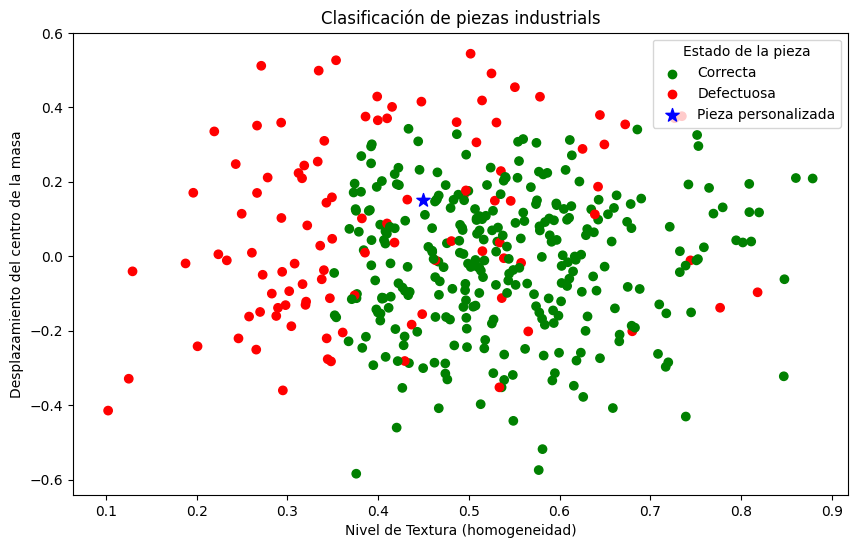

In [293]:
example = PieceAnalysisExample()
example.run()
